In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  Importing the user ratings data

df = pd.read_csv("ratings.csv")


In [4]:
df.head()

,user_id,movie_id,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# Importing Movies data

movie_name = pd.read_csv("movies.csv", usecols = ["movie_id","title"])
movie_name.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
# Merging the two data (ratings and movies) into single dataframe

df = pd.merge(df, movie_name, on = "movie_id")

In [7]:
df.head()

,user_id,movie_id,rating,timestamp,title
0,1,2,3.5,1112486027,Jumanji (1995)
1,5,2,3.0,851527569,Jumanji (1995)
2,13,2,3.0,849082742,Jumanji (1995)
3,29,2,3.0,835562174,Jumanji (1995)
4,34,2,3.0,846509384,Jumanji (1995)


In [8]:
df.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
title        0
dtype: int64

In [9]:
# Creating a rating dataframe with average rating and number of ratings

In [10]:
# Average Rating

In [11]:
df.groupby("title")["rating"].mean().sort_values(ascending = False).head()

title
Still Bill (2009)                                  5.0
Nameless Gangster (Bumchoiwaui junjaeng) (2012)    5.0
Szamanka (1996)                                    5.0
Keith (2008)                                       5.0
Kiler (1997)                                       5.0
Name: rating, dtype: float64

In [12]:
# Number of Ratings

In [13]:
df.groupby("title")["rating"].count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
Name: rating, dtype: int64

In [14]:
# creating a rating dataframe for average rating

In [15]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.875
$5 a Day (2008),3.300
'71 (2014),3.000
'Hellboy': The Seeds of Creation (2004),3.125
'Neath the Arizona Skies (1934),3.500


In [16]:
# Merging no_of_ratings with average rating

In [17]:
ratings["no_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [18]:
ratings.head()

,rating,no_of_ratings
title,,
"""Great Performances"" Cats (1998)",2.875,8
$5 a Day (2008),3.300,5
'71 (2014),3.000,1
'Hellboy': The Seeds of Creation (2004),3.125,4
'Neath the Arizona Skies (1934),3.500,2


In [19]:
# Exploratory data analysis for some basic information about the dataset 
# using visualization libraries

sns.set_style("white")
%matplotlib inline

<AxesSubplot:>

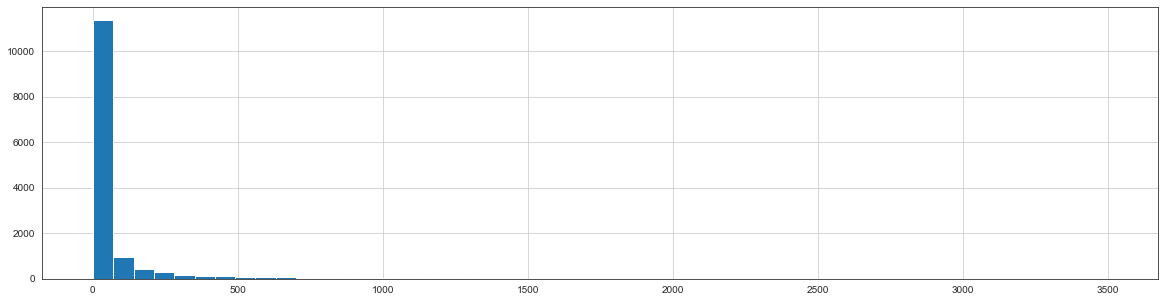

In [20]:
# Distribution of no of ratings for different movies

plt.figure(figsize=(20,5))
ratings["no_of_ratings"].hist(bins=50)

<AxesSubplot:>

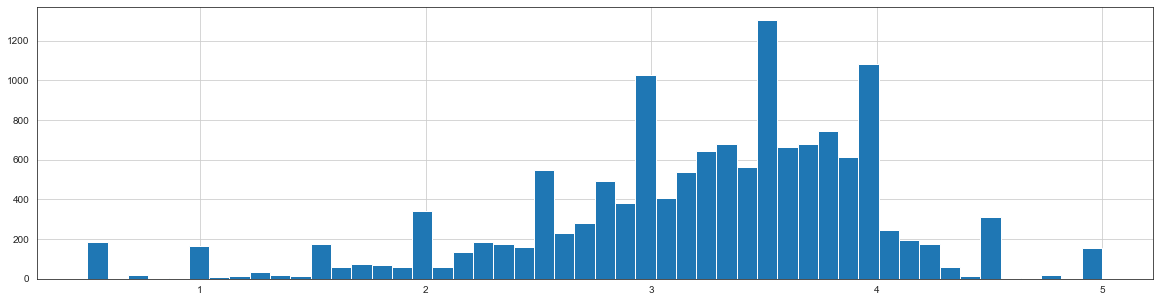

In [21]:
# Distribution of average ratings (outliers can also be observed)
plt.figure(figsize=(20,5))
ratings["rating"].hist(bins=50)

In [22]:
# Jointplot to show variation of rating given with no of ratings

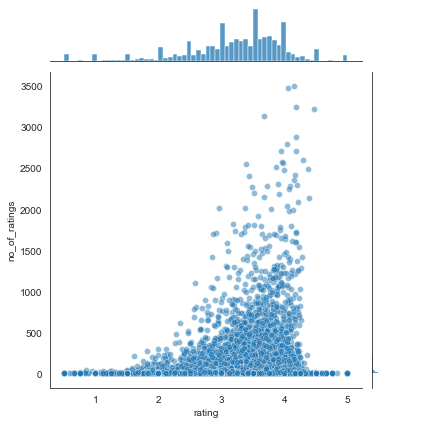

In [23]:
sns.jointplot(x = "rating", y="no_of_ratings", data = ratings, alpha = 0.5, height = 6)

In [24]:
# Creating a movie matrix to clearly observe if a particular user has given rating to a movie.

In [25]:
movie_matrix = df.pivot_table(index ="user_id", columns ="title", values ="rating") 
  
movie_matrix.head() 

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Sorting ratings dataframe on No_of_ratings to see most rated movies

In [63]:
ratings.sort_values("no_of_ratings",ascending=False).head(10)

,rating,no_of_ratings
title,,
Pulp Fiction (1994),4.153516,3498
Forrest Gump (1994),4.056530,3476
"Silence of the Lambs, The (1991)",4.184786,3247
"Shawshank Redemption, The (1994)",4.469994,3216
Jurassic Park (1993),3.680409,3129
Star Wars: Episode IV - A New Hope (1977),4.189457,2874
Braveheart (1995),4.038228,2799
Terminator 2: Judgment Day (1991),3.948359,2711
"Matrix, The (1999)",4.176340,2705


In [64]:
# Now, let's take a movie and consider as seen for recommending next movie to watch.
# Let us consider "Pulp Fiction (1994)" as most people have rated it (seems popular) and average rating is also decent.

In [65]:
ratings.head()

,rating,no_of_ratings
title,,
"""Great Performances"" Cats (1998)",2.875,8
$5 a Day (2008),3.300,5
'71 (2014),3.000,1
'Hellboy': The Seeds of Creation (2004),3.125,4
'Neath the Arizona Skies (1934),3.500,2


In [66]:
pulpfiction_ratings = movie_matrix["Pulp Fiction (1994)"]
pulpfiction_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [73]:
df["user_id"].nunique()

7120

In [74]:
# Now, using the corrwith() method of pandas to compute pairwise correlation (or to get correlations between two pandas series)

In [77]:
similar_pulpfiction = movie_matrix.corrwith(pulpfiction_ratings)

In [78]:
# creating a correlation data frame and removing NaN values

In [79]:
corr_pulpfiction = pd.DataFrame(similar_pulpfiction,columns=["Correlation"])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
'Round Midnight (1986),0.833333
'Salem's Lot (2004),0.683130
'Til There Was You (1997),-0.072479
"'burbs, The (1989)",-0.071418
(500) Days of Summer (2009),0.066468


In [80]:
# Sorting data frame by correlation values to get most similar movies on top. However, note that we might get some results tha doesn't make much sense. This is because there are many movies watched only once by users who also watched Pulp Fiction (as it was most popular movie)

In [81]:
corr_pulpfiction.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
"Hired Hand, The (1971)",1.0
Shuttle (2008),1.0
"Children of Huang Shi, The (2008)",1.0
Lost Boys: The Thirst (2010),1.0
"Lost Embrace (Abrazo partido, El) (2004)",1.0
Louis C.K.: Live at The Comedy Store (2015),1.0
Love in the Time of Cholera (2007),1.0
"Simple-Minded Murder, The (Enfaldige mördaren, Den) (1982)",1.0
"Lower Depths, The (Donzoko) (1957)",1.0


In [82]:
# Let us fix the no of rating issue by filtering the movies that have less than 150 ratings (this value is choosen based on the histogram plotted earlier)

In [83]:
corr_pulpfiction = corr_pulpfiction.join(ratings["no_of_ratings"])
corr_pulpfiction.head()

,Correlation,no_of_ratings
title,,
'Round Midnight (1986),0.833333,7
'Salem's Lot (2004),0.683130,7
'Til There Was You (1997),-0.072479,38
"'burbs, The (1989)",-0.071418,163
(500) Days of Summer (2009),0.066468,271


In [84]:
# Now sorting on basis of correlation and removing movies with less than 150 ratings.

In [87]:
corr_pulpfiction[corr_pulpfiction["no_of_ratings"]>150].sort_values("Correlation",ascending=False).head()

,Correlation,no_of_ratings
title,,
Pulp Fiction (1994),1.000000,3498
Reservoir Dogs (1992),0.535822,1414
Kill Bill: Vol. 2 (2004),0.399329,1006
Django Unchained (2012),0.389830,220
Fight Club (1999),0.380831,2085


# So the next movie recommended after "Pulp Fiction" is "Reservoir Dogs"